In [1]:
import sys, os, getpass, warnings
warnings.filterwarnings('ignore')
#sys.path.append(os.path.abspath(os.path.join(os.path.dirname(os.path.realpath("__file__")), '..', 'src')))  # append parent directory to search path
from patterns.visualizer import Visualizer

Bring in data from database and annotate it with *locc*, *locc+*, *locc-*, *change-size-cos* = *1-similarity* (**expensive call**)

In [2]:
vis = Visualizer(project_name='spack', db_pwd=getpass.getpass(prompt='Database password:'))
vis.get_data()

Database password: ·······


In [3]:
all_commits = vis.commit_data
all_commits.head()

,sha,branch,author,message,filepath,diff,year,month,day,doy,dow,locc,locc-,locc+,change-size-cos
datetime,,,,,,,,,,,,,,,
2021-02-16 11:01:06,67874420c78eb986282ea4e0f531d66929c1de70,* develop\n remotes/origin/HEAD -> origin/dev...,Ryan S. Elliott,bump openkim-models to 2021.01.28 (#21637),var/spack/repos/builtin/packages/openkim-model...,"- url = ""https://s3.openkim.org/archiv...",2021,2,16,47,Tuesday,5,1,4,0.379826
2021-02-11 18:10:45,f92580240e8e4b50b68d4a26a0c6286a096dcd4f,* develop\n remotes/origin/HEAD -> origin/dev...,Ryan S. Elliott,Add support for KIM package in LAMMPS (#21638),var/spack/repos/builtin/packages/lammps/packag...,"+ variant('kim', default=True,\n+ ...",2021,2,11,42,Thursday,5,0,5,1.000000
2020-12-17 08:44:33,12378db0d8eec62fc9f7cfbadd4e1291d4da9bc4,* develop\n remotes/origin/HEAD -> origin/dev...,Ryan S. Elliott,kim-api: added v2.2.1 (#20382),var/spack/repos/builtin/packages/kim-api/packa...,"- url = ""https://s3.openkim.org/kim-ap...",2020,12,17,352,Thursday,3,1,2,0.366505
2019-08-20 07:29:17,7737d623b02dc2ce112114632830f2a9609777b9,* develop\n remotes/origin/HEAD -> origin/dev...,Ryan S. Elliott,kim-api: added version 2.1.3 (#12457),var/spack/repos/builtin/packages/kim-api/packa...,"- url = ""https://s3.openkim.org/kim-ap...",2019,8,20,232,Tuesday,3,1,2,0.366505
2019-07-31 00:13:13,86ff5baed72dc119c372a0640245b561bd8ecfbf,* develop\n remotes/origin/HEAD -> origin/dev...,Ryan S. Elliott,kim-api: added version 2.1.2 (#12189),var/spack/repos/builtin/packages/kim-api/packa...,"- url = ""https://s3.openkim.org/kim-ap...",2019,7,31,212,Wednesday,3,1,2,0.366505


## Remove all noncode files
The determination of what is code is made by including common suffixes, as well as checking manually a sampling of ECP projects for the suffixes used for things that can be labeled as code (vs. input simulation data, documentation, or generated files).

In [4]:
vis.remove_noncode()
print("Removed %d noncode files!" % (all_commits.shape[0] - vis.commit_data.shape[0]))
vis.commit_data.head()

Removed 3919 noncode files!


,sha,branch,author,message,filepath,diff,year,month,day,doy,dow,locc,locc-,locc+,change-size-cos
datetime,,,,,,,,,,,,,,,
2021-02-16 11:01:06,67874420c78eb986282ea4e0f531d66929c1de70,* develop\n remotes/origin/HEAD -> origin/dev...,Ryan S. Elliott,bump openkim-models to 2021.01.28 (#21637),var/spack/repos/builtin/packages/openkim-model...,"- url = ""https://s3.openkim.org/archiv...",2021,2,16,47,Tuesday,5,1,4,0.379826
2021-02-11 18:10:45,f92580240e8e4b50b68d4a26a0c6286a096dcd4f,* develop\n remotes/origin/HEAD -> origin/dev...,Ryan S. Elliott,Add support for KIM package in LAMMPS (#21638),var/spack/repos/builtin/packages/lammps/packag...,"+ variant('kim', default=True,\n+ ...",2021,2,11,42,Thursday,5,0,5,1.000000
2020-12-17 08:44:33,12378db0d8eec62fc9f7cfbadd4e1291d4da9bc4,* develop\n remotes/origin/HEAD -> origin/dev...,Ryan S. Elliott,kim-api: added v2.2.1 (#20382),var/spack/repos/builtin/packages/kim-api/packa...,"- url = ""https://s3.openkim.org/kim-ap...",2020,12,17,352,Thursday,3,1,2,0.366505
2019-08-20 07:29:17,7737d623b02dc2ce112114632830f2a9609777b9,* develop\n remotes/origin/HEAD -> origin/dev...,Ryan S. Elliott,kim-api: added version 2.1.3 (#12457),var/spack/repos/builtin/packages/kim-api/packa...,"- url = ""https://s3.openkim.org/kim-ap...",2019,8,20,232,Tuesday,3,1,2,0.366505
2019-07-31 00:13:13,86ff5baed72dc119c372a0640245b561bd8ecfbf,* develop\n remotes/origin/HEAD -> origin/dev...,Ryan S. Elliott,kim-api: added version 2.1.2 (#12189),var/spack/repos/builtin/packages/kim-api/packa...,"- url = ""https://s3.openkim.org/kim-ap...",2019,7,31,212,Wednesday,3,1,2,0.366505


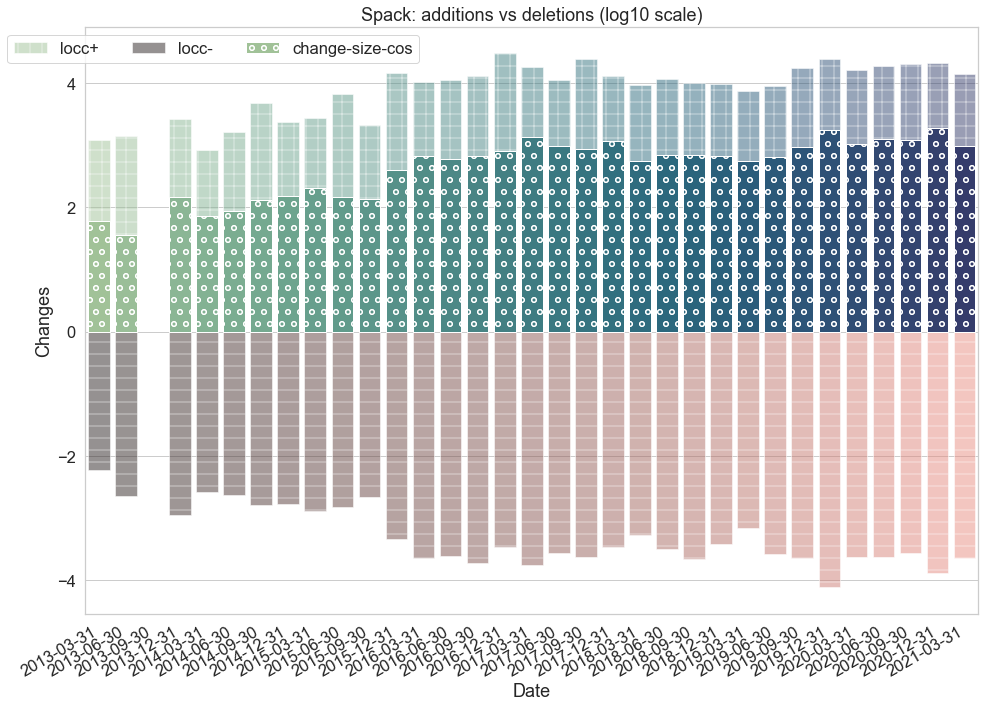

In [5]:
df = vis.plot_overall_project_locc(time_range=None, log=True)

to focus on a given year and/or month, set *year* and *month* fields

In [6]:
vis.set_year(2020)
vis.set_month(7)

to plot for a given year, provide *time_range='year'*

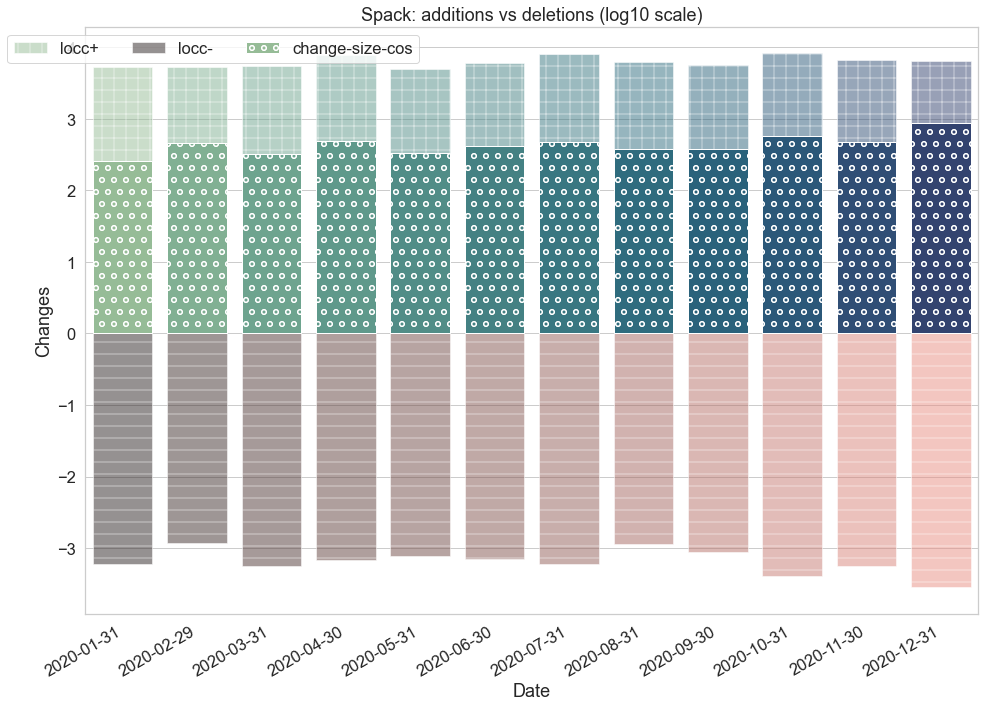

In [7]:
df = vis.plot_overall_project_locc(time_range='year',log=True)

similarly to plot for a given month, set *time_range='month'*

,year,month,day,doy,locc,locc-,locc+,change-size-cos,date
datetime,,,,,,,,,
2020-07-01,20200,70,10,1830,365,-2.193125,2.320146,0.920611,2020-07-01
2020-07-02,40400,140,40,3680,161,-1.278754,2.152288,1.136895,2020-07-02
2020-07-03,10100,35,15,925,70,-0.477121,1.826075,0.580587,2020-07-03
2020-07-04,8080,28,16,744,141,-1.079181,2.110590,0.431884,2020-07-04
2020-07-05,34340,119,85,3179,84,-1.301030,1.806180,0.988033,2020-07-05
2020-07-06,18180,63,54,1692,195,-1.176091,2.255273,0.471785,2020-07-06
2020-07-07,38380,133,133,3591,193,-1.431364,2.220108,0.840617,2020-07-07
2020-07-08,48480,168,192,4560,1190,-1.230449,3.069298,1.312069,2020-07-08
2020-07-09,26260,91,117,2483,79,-1.146128,1.812913,0.869157,2020-07-09


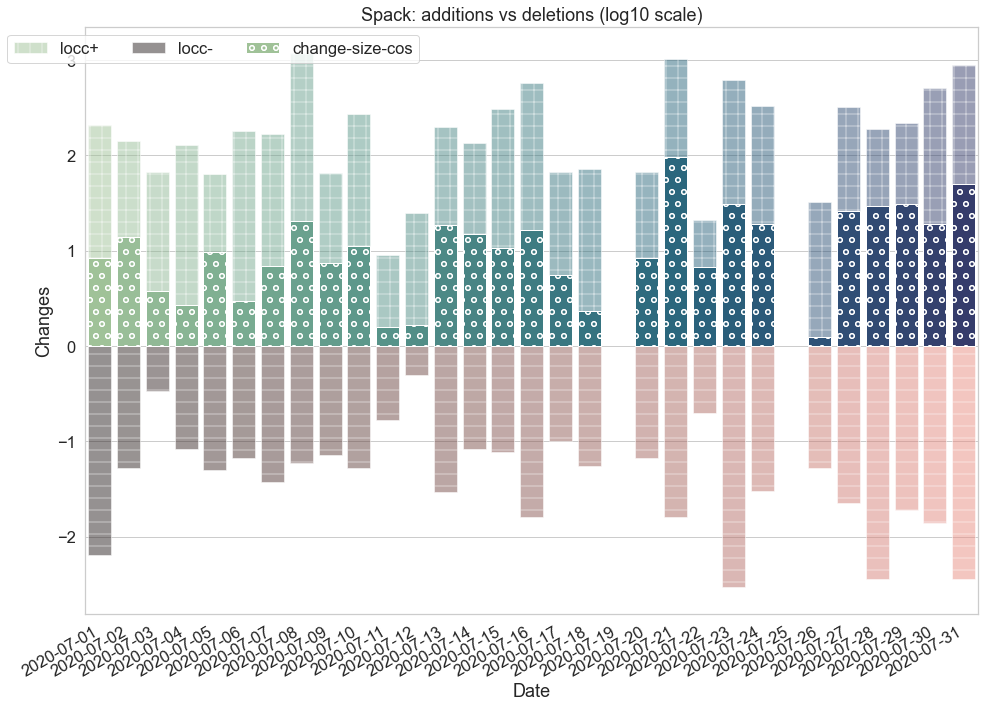

In [8]:
vis.plot_overall_project_locc(time_range='month',log=True)

### Averages: Total changed lines over time

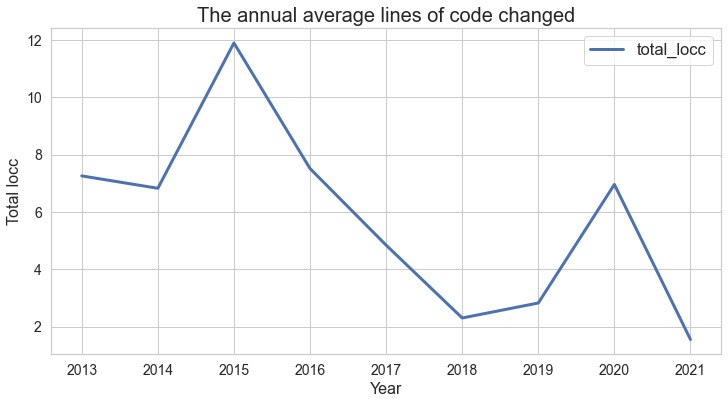

In [9]:
vis.plot_total_locc_avg()

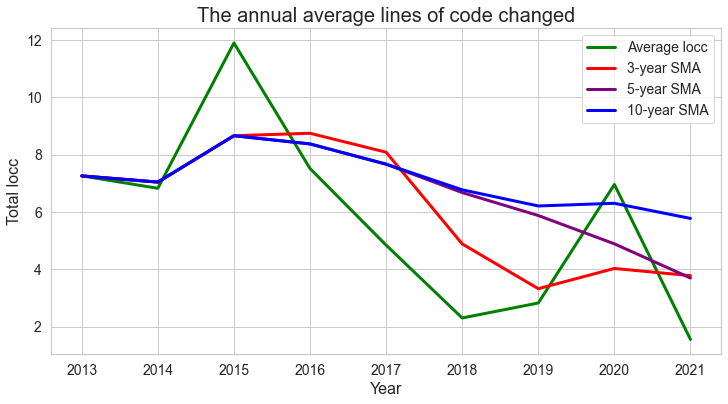

In [10]:
vis.plot_total_locc_moving_avgs()

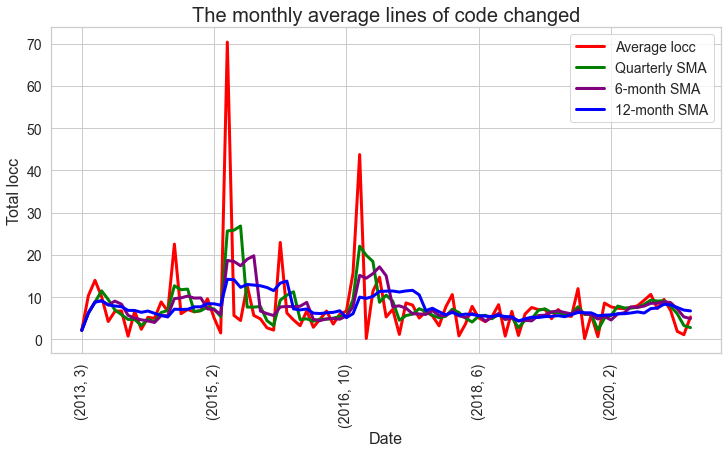

In [11]:
vis.plot_total_locc_moving_avgs_M()

## Total changed lines over time
This reflects changed lines of code as reported in git commit diffs.

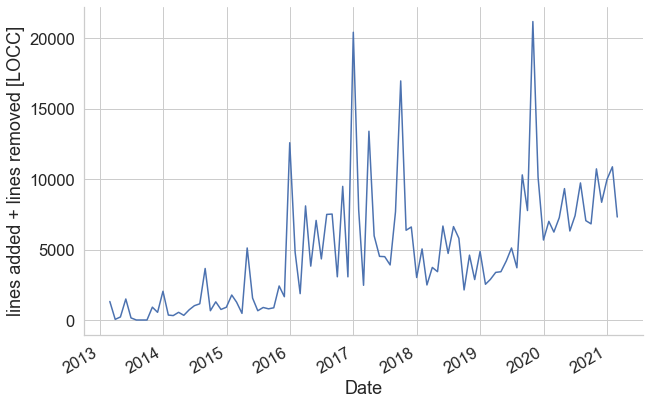

In [12]:
df = vis.plot_project_locc_line()

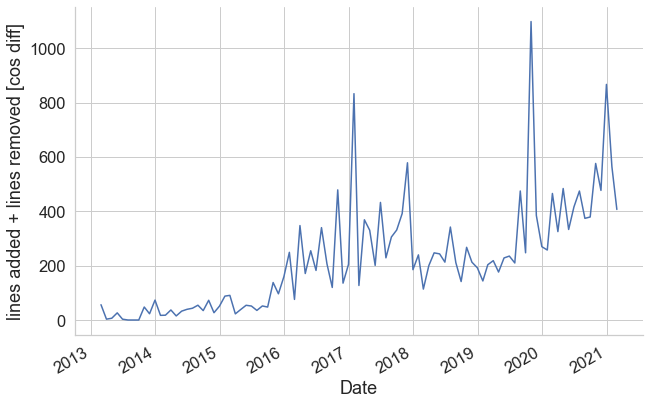

In [13]:
df2 = vis.plot_project_locc_line(locc=False)

,year,month,day,doy,locc,locc-,locc+,change-size-cos
datetime,,,,,,,,
2013-02-28 00:00:00+00:00,213378,212,1945,5231,1313,159,1154,56.312206
2013-03-31 00:00:00+00:00,24156,36,270,978,46,7,39,3.129232
2013-04-30 00:00:00+00:00,24156,48,48,1128,216,37,179,6.492891
2013-05-31 00:00:00+00:00,104676,260,612,6852,1491,375,1116,26.291430
2013-06-30 00:00:00+00:00,14091,42,203,1260,149,30,119,3.039233


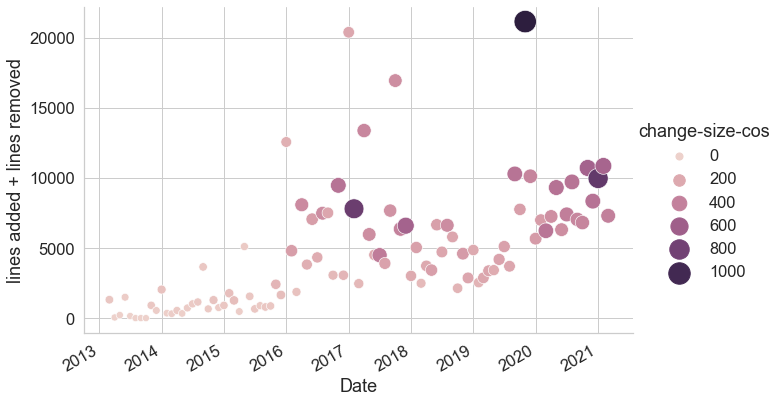

In [14]:
import seaborn as sns
sns.set(font_scale=1.5)
with sns.axes_style("whitegrid"):
    g = sns.relplot(data=df2, x="datetime", y="locc", size="change-size-cos", hue="change-size-cos", sizes=(50, 500),
                    height=6, aspect=1.5, kind="scatter")
    g.ax.set_xlabel('Date')
    g.ax.set_ylabel('lines added + lines removed')
    g.fig.autofmt_xdate()
    g.fig.show()
df.head()

### Using a distance metric to adjust the size of the changes

We use the python [textdistance](https://github.com/life4/textdistance) module. The following algorithms have been integrated with the visualizer.
```
'cos', 'hamming', 'damerau_levenshtein', 'jaccard', 'jaro', 'jaro_winkler', 'bag', 'editex'
```

,year,month,day,doy,locc,locc-,locc+,change-size-cos,change-size-jaccard
datetime,,,,,,,,,
2013-02-28 00:00:00+00:00,213378,212,1945,5231,1313,159,1154,56.312206,61.410472
2013-03-31 00:00:00+00:00,24156,36,270,978,46,7,39,3.129232,3.816279
2013-04-30 00:00:00+00:00,24156,48,48,1128,216,37,179,6.492891,7.214383
2013-05-31 00:00:00+00:00,104676,260,612,6852,1491,375,1116,26.291430,29.588803
2013-06-30 00:00:00+00:00,14091,42,203,1260,149,30,119,3.039233,3.727548


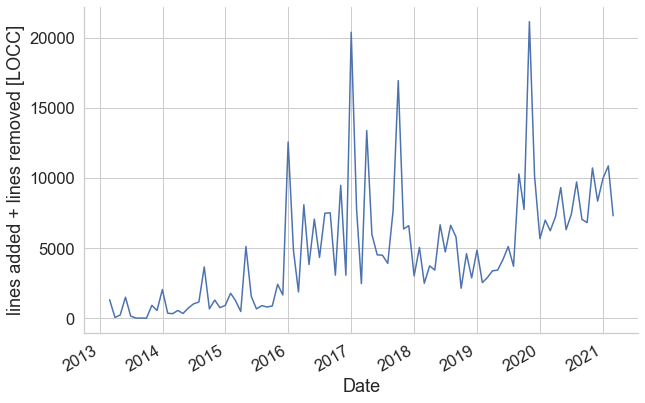

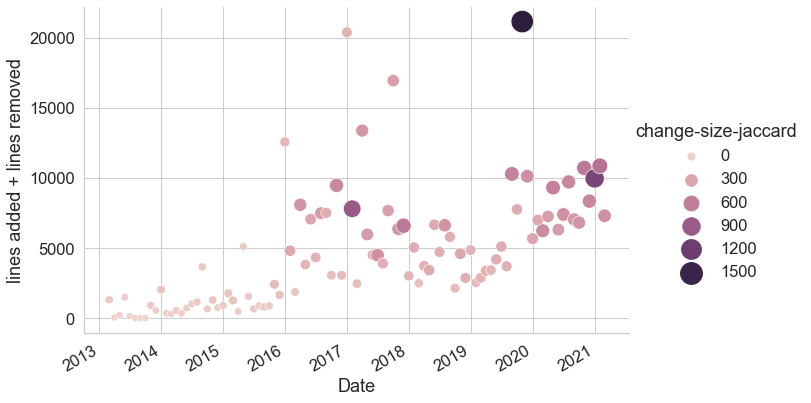

In [15]:
diff_alg = 'jaccard'
df = vis.plot_project_locc_line(diff_alg=diff_alg, log=False)
import seaborn as sns
sns.set(font_scale=1.5)
with sns.axes_style("whitegrid"):
    g = sns.relplot(data=df, x="datetime", y="locc", size="change-size-%s" % diff_alg, hue="change-size-%s" % diff_alg, sizes=(50, 500),
                    height=6, aspect=1.5, kind="scatter")
    g.ax.set_xlabel('Date')
    g.ax.set_ylabel('lines added + lines removed')
    g.fig.autofmt_xdate()
    g.fig.show()
df.head()

## Change size over time

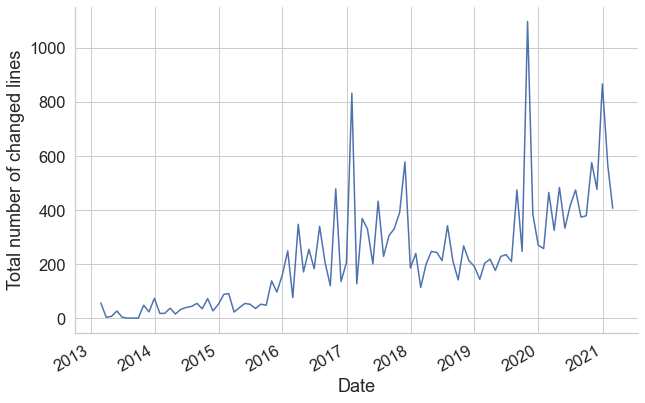

In [16]:
df = vis.plot_proj_change_size(time_range=None)

Similarly, we can 'zoom' into a specific year

(                              year  month    day     doy   locc  locc-  locc+  \
 datetime                                                                        
 2020-01-31 00:00:00+00:00   941320    466   7838    7838   6999   1649   5350   
 2020-02-29 00:00:00+00:00  1256440   1244  10548   29830   6238    849   5389   
 2020-03-31 00:00:00+00:00  1092820   1623   9289   41749   7259   1785   5474   
 2020-04-30 00:00:00+00:00  1844260   3652  14347   97430   9321   1448   7873   
 2020-05-31 00:00:00+00:00  1040300   2575   7615   69930   6315   1291   5024   
 2020-06-30 00:00:00+00:00  1313000   3900  11845  110645   7402   1438   5964   
 2020-07-31 00:00:00+00:00  1426120   4942  14361  142853   9724   1662   8062   
 2020-08-31 00:00:00+00:00  1171600   4640   9632  133172   7048    884   6164   
 2020-09-30 00:00:00+00:00  1363500   6075   9027  173727   6819   1141   5678   
 2020-10-31 00:00:00+00:00  1785680   8840  15405  257621  10720   2450   8270   
 2020-11-30 00:0

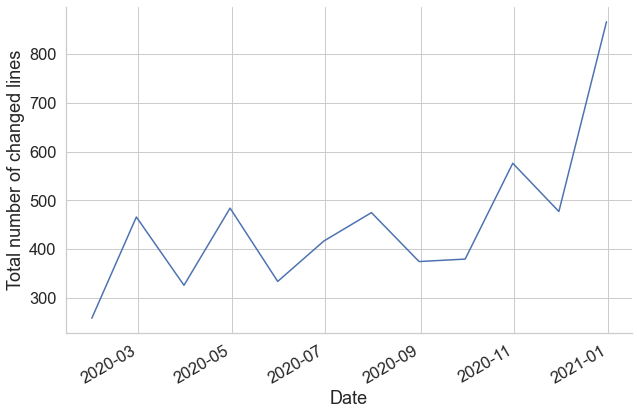

In [17]:
vis.plot_proj_change_size(time_range='year')

Or a specific year range

(                              year  month     day      doy   locc  locc-  \
 datetime                                                                   
 2018-01-31 00:00:00+00:00   827380    410    5939     5939   5042    787   
 2018-02-28 00:00:00+00:00   377366    374    2990     8787   2487    443   
 2018-03-31 00:00:00+00:00  6328448   9408   73142   258166   3730    657   
 2018-04-30 00:00:00+00:00  1204746   2388   10779    64509   3427    656   
 2018-05-31 00:00:00+00:00   986802   2445    7464    66144   6666   1453   
 2018-06-30 00:00:00+00:00   787020   2340    6462    65352   4723    992   
 2018-07-31 00:00:00+00:00  1628526   5649   17087   163154   6627   2253   
 2018-08-31 00:00:00+00:00   964604   3824    7311   108647   5796   1884   
 2018-09-30 00:00:00+00:00   433870   1935    3076    55321   2134    397   
 2018-10-31 00:00:00+00:00  6796624  33680   27611   947075   4601   1011   
 2018-11-30 00:00:00+00:00   643742   3509    4901   101877   2869    553   

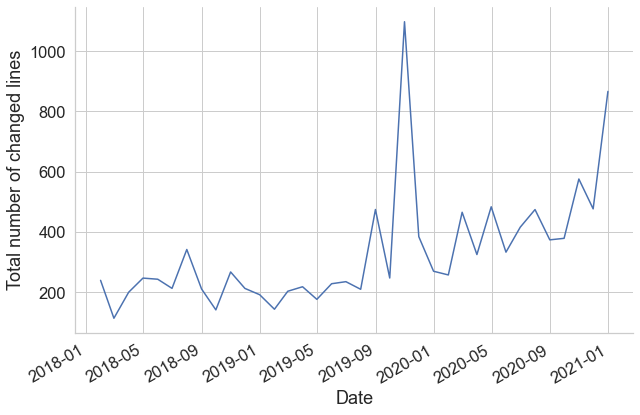

In [18]:
vis.select_year_range(2018,2020)
vis.plot_proj_change_size(time_range='year-year')

we can zoom into a month

(                             year  month   day    doy  locc  locc-  locc+  \
 datetime                                                                    
 2020-07-01 00:00:00+00:00   20200     70    10   1830   365    156    209   
 2020-07-02 00:00:00+00:00   40400    140    40   3680   161     19    142   
 2020-07-03 00:00:00+00:00   10100     35    15    925    70      3     67   
 2020-07-04 00:00:00+00:00    8080     28    16    744   141     12    129   
 2020-07-05 00:00:00+00:00   34340    119    85   3179    84     20     64   
 2020-07-06 00:00:00+00:00   18180     63    54   1692   195     15    180   
 2020-07-07 00:00:00+00:00   38380    133   133   3591   193     27    166   
 2020-07-08 00:00:00+00:00   48480    168   192   4560  1190     17   1173   
 2020-07-09 00:00:00+00:00   26260     91   117   2483    79     14     65   
 2020-07-10 00:00:00+00:00   32320    112   160   3072   288     19    269   
 2020-07-11 00:00:00+00:00    6060     21    33    579    15    

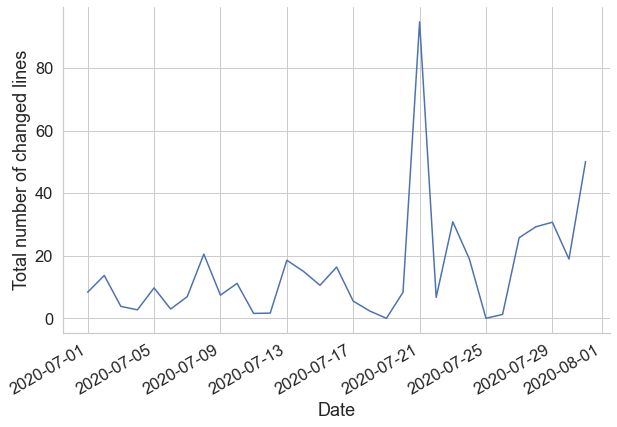

In [19]:
vis.plot_proj_change_size(time_range='month')

Or a month range

(                              year  month    day     doy   locc  locc-  locc+  \
 datetime                                                                        
 2018-05-31 00:00:00+00:00   986802   2445   7464   66144   6666   1453   5213   
 2018-06-30 00:00:00+00:00   787020   2340   6462   65352   4723    992   3731   
 2018-07-31 00:00:00+00:00  1628526   5649  17087  163154   6627   2253   4374   
 2018-08-31 00:00:00+00:00   964604   3824   7311  108647   5796   1884   3912   
 2018-09-30 00:00:00+00:00   433870   1935   3076   55321   2134    397   1737   
 2018-10-31 00:00:00+00:00  6796624  33680  27611  947075   4601   1011   3590   
 2018-11-30 00:00:00+00:00   643742   3509   4901  101877   2869    553   2316   
 2018-12-31 00:00:00+00:00        0      0      0       0      0      0      0   
 2019-01-31 00:00:00+00:00        0      0      0       0      0      0      0   
 2019-02-28 00:00:00+00:00        0      0      0       0      0      0      0   
 2019-03-31 00:0

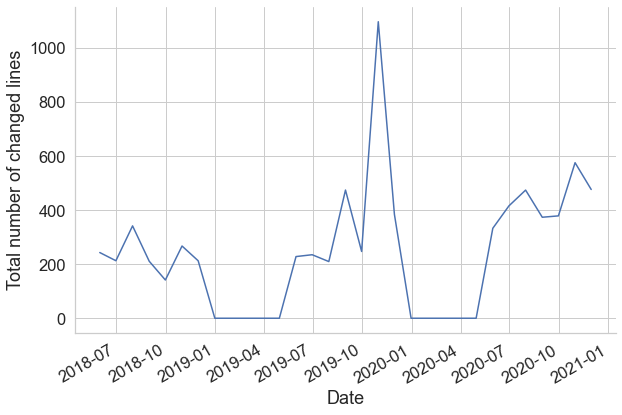

In [20]:
vis.select_month_range(5,11)
vis.plot_proj_change_size(time_range='month-month')

## More patterns
Here we look at a combination of the the high-churn and domain champion patterns. Basically we are focusing on the files that have the most changes and restricting the developers by those with the biggest contributions.

author,Todd Gamblin,Adam J. Stewart,Massimiliano Culpo,Glenn Johnson,Peter Scheibel,Greg Becker,Patrick Gartung,alalazo,Denis Davydov,Scott Wittenburg
filepath,,,,,,,,,,
lib/spack/spack.../environment.py,1464,33,217,0,126,309,0,398,15,0
lib/spack/spack/config.py,1134,2,68,0,0,10,0,319,0,0
lib/spack/spack/database.py,473,0,92,0,508,146,0,0,0,35
lib/spack/spack/package.py,2678,544,366,0,166,273,36,914,21,3
lib/spack/spack/solver/asp.py,1624,4,906,0,0,0,0,0,0,22


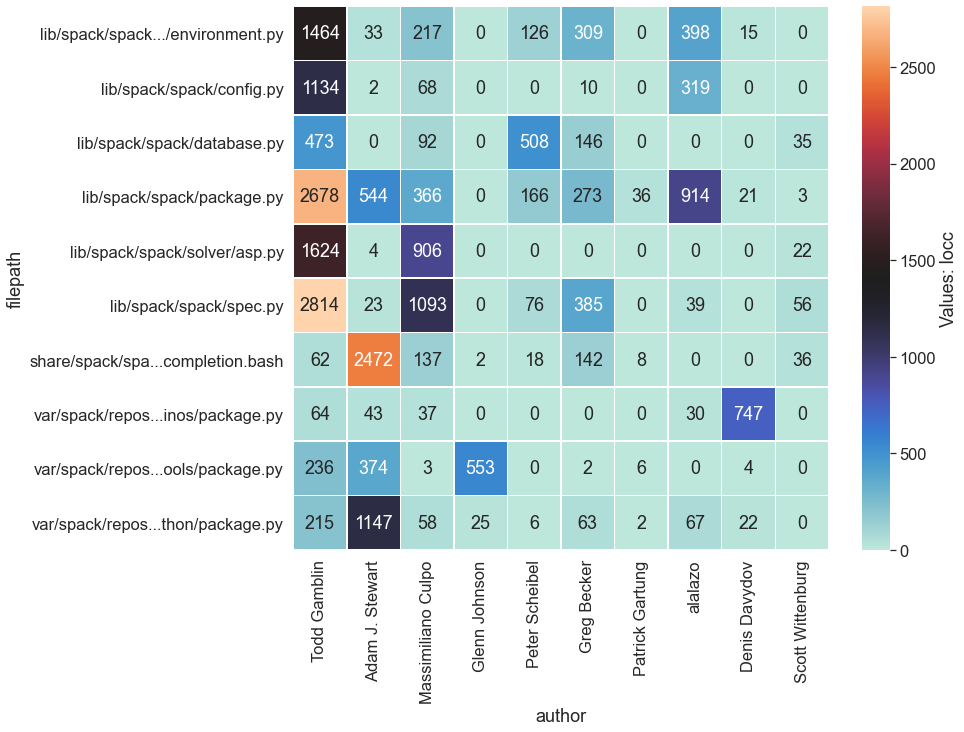

In [21]:
N = 10
vis.set_max_label_length(30)
top_N = vis.plot_top_N_heatmap(N, value_column='locc')
top_N.head()

author,Adam J. Stewart,Todd Gamblin,Massimiliano Culpo,Glenn Johnson,darmac,Michael Kuhn,Denis Davydov,Ben Boeckel,Greg Becker,Axel Huebl
filepath,,,,,,,,,,
lib/spack/spack..._environment.py,6.316992,24.674549,8.862148,1.000000,0.0,4.000000,2.186665,2.203120,4.242364,0.000000
lib/spack/spack/package.py,13.246654,79.241731,17.911265,0.000000,0.0,4.000000,2.432605,1.120013,8.107527,1.871435
lib/spack/spack/spec.py,1.101635,57.468303,18.853954,0.000000,0.0,1.074349,0.000000,1.269959,7.778804,0.000000
var/spack/repos...core/package.py,23.143594,5.182893,1.000000,0.363473,1.0,2.649721,0.000000,0.241213,0.000000,0.000000
var/spack/repos...make/package.py,9.296621,2.981742,4.047938,0.000000,1.0,3.386468,1.000000,0.143651,0.000000,4.544403


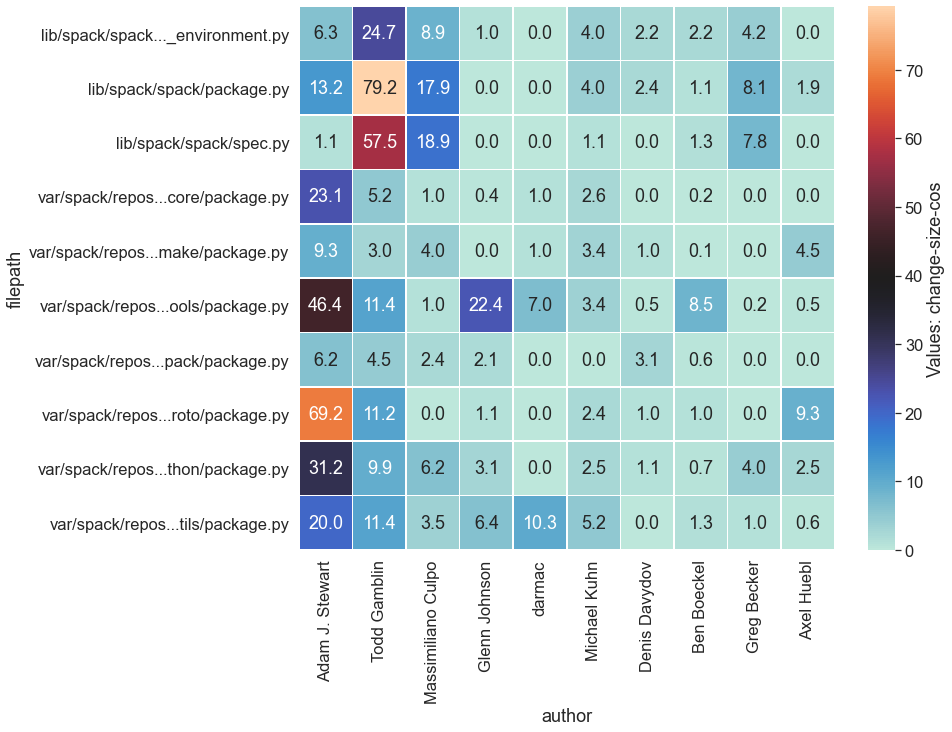

In [22]:
import seaborn as sns
top_N = vis.plot_top_N_heatmap(N, value_column='change-size-cos')
top_N.head()

In [23]:
from patterns.patterns import Patterns
df = vis.commit_data

In [24]:
vis.reset()
vis.annotate_metrics(diff_alg='cos')
file_dev_locc = vis.make_file_developer_df(value_column='locc')
file_dev_diff = vis.make_file_developer_df(value_column='change-size-cos')

In [25]:
diff_df = file_dev_locc.sub(file_dev_diff, axis=0)
print(diff_df.shape)
diff_df.head()

(4652, 806)


author,0t1s1,AMD Toolchain Support,AP97,Aaron Fisher,Abhinav Bhatele,Abhishek Kulkarni,Adam Fidel,Adam J. Stewart,Adam Lyon,Adam Moody,...,wspear,xfzhao,yellowhat,ynanyam,zenln,zhiyuanzhai,zorun,zschulte,健美猞猁,健美猫
filepath,,,,,,,,,,,,,,,,,,,,,
.codecov.yml,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.662122,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
.github/actions...s/entrypoint.py,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
.github/dependabot.yml,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
.github/workflo...acos_python.yml,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.635392,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
.github/workflo...e_and_docs.yaml,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.891989,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


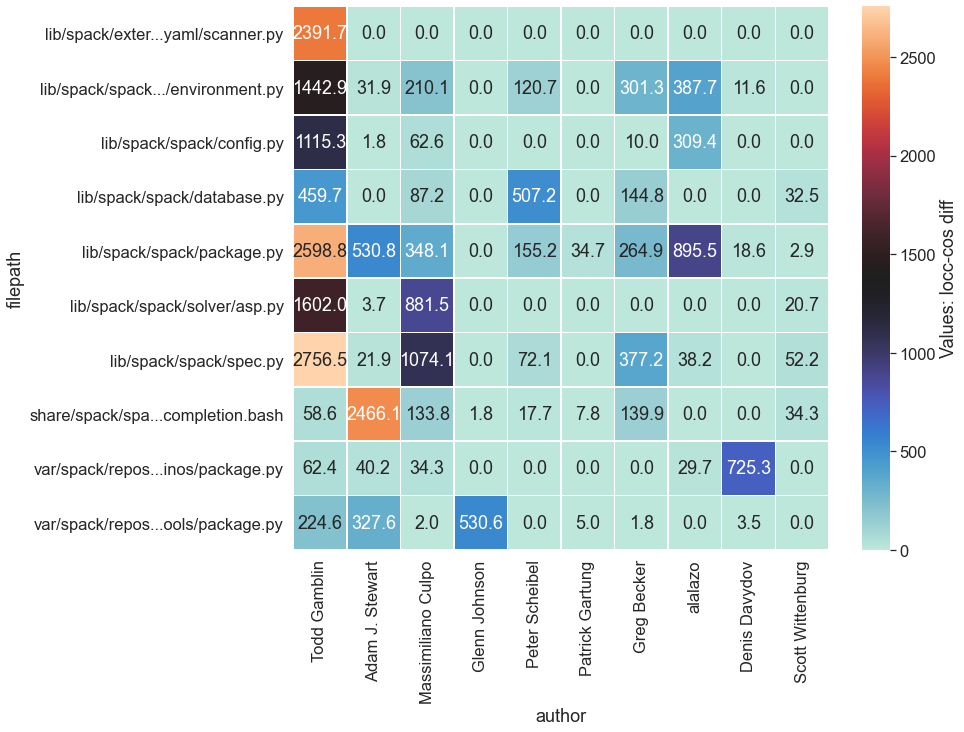

In [26]:
df = vis.commit_data
df['locc-cos diff'] = df['locc']-df['change-size-cos']
d = vis.plot_top_N_heatmap(top_N = 10, value_column='locc-cos diff', my_df=df)

In [27]:
#= vis.plot_top_N_heatmap(20,my_df=diff_df)